In [1]:
import pandas as pd 
import pandas_datareader as pdr

In [2]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default ='colab'

In [3]:
eth_df = pdr.DataReader('ETH-USD', data_source='yahoo',start='2020-01-01', end='2021-03-27')
eth_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,132.835358,129.198288,129.630661,130.802002,7.935230e+09,130.802002
2020-01-02,130.820038,126.954910,130.820038,127.410179,8.032709e+09,127.410179
2020-01-03,134.554016,126.490021,127.411263,134.171707,1.047685e+10,134.171707
2020-01-04,136.052719,133.040558,134.168518,135.069366,7.430905e+09,135.069366
2020-01-05,139.410202,135.045624,135.072098,136.276779,7.526675e+09,136.276779
...,...,...,...,...,...,...
2021-03-24,1740.428223,1570.787964,1678.002563,1593.413452,3.122805e+10,1593.413452
2021-03-25,1625.911499,1560.370483,1593.123291,1595.359253,2.965033e+10,1595.359253
2021-03-26,1702.922852,1594.736694,1595.210083,1702.842041,2.254852e+10,1702.842041


In [4]:
eth_df = eth_df.reset_index()
px.area(eth_df, x='Date', y='Close')

In [6]:
eth = eth_df[['Date', 'Close']]
eth = eth.rename(columns={'Date':'ds', 'Close':'y'})
eth.head()

,ds,y
0,2020-01-01,130.802002
1,2020-01-02,127.410179
2,2020-01-03,134.171707
3,2020-01-04,135.069366
4,2020-01-05,136.276779


In [8]:
from fbprophet import Prophet

In [9]:
model = Prophet()
model.fit(eth)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

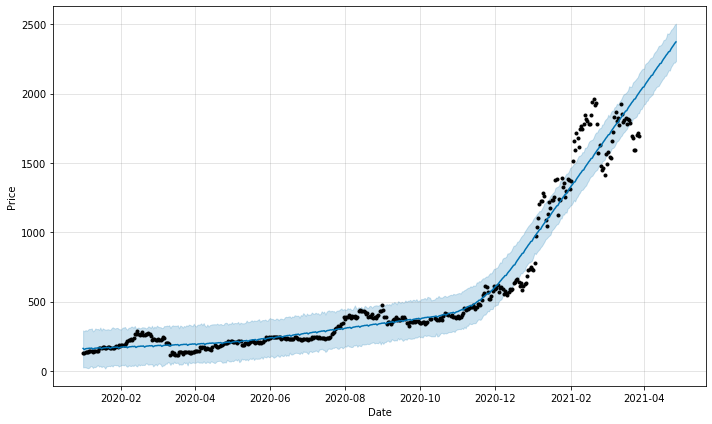

In [12]:
figure = model.plot(forecast, xlabel='Date', ylabel='Price')

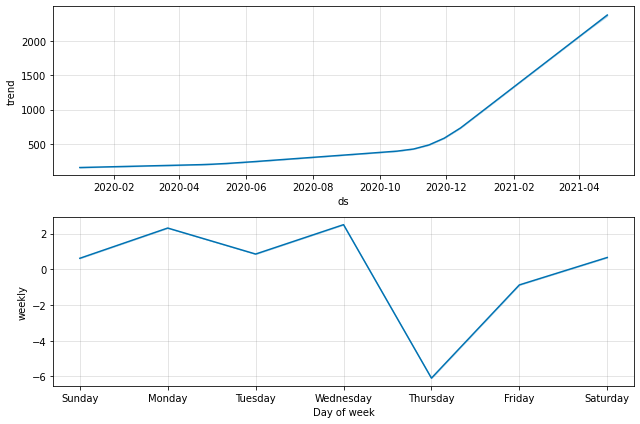

In [14]:
figure2 = model.plot_components(forecast)

In [15]:
april_eth = pdr.DataReader('ETH-USD', data_source='yahoo',start='2021-03-28', end='2021-04-27')
april_eth

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-28,1728.584106,1672.660400,1716.405640,1691.355957,16599472938,1691.355957
2021-03-28,1837.187988,1683.716553,1691.263184,1819.684937,22796570548,1819.684937
2021-03-29,1860.974731,1793.922363,1819.466309,1846.033691,22512781703,1846.033691
2021-03-30,1947.837769,1793.002197,1846.098267,1918.362061,30226902621,1918.362061
2021-03-31,1989.055054,1912.178467,1919.157227,1977.276855,30914259795,1977.276855
2021-04-01,2152.451904,1960.678711,1976.932739,2143.225586,34862511022,2143.225586
2021-04-02,2144.962402,2028.422485,2142.895996,2028.422485,32011518871,2028.422485
2021-04-03,2110.353516,2007.111816,2027.671265,2093.122803,26006501902,2093.122803
2021-04-04,2140.985352,2032.387695,2093.260742,2107.887207,28889391170,2107.887207


In [20]:
apr_close = april_eth[['Close']]
apr_close = apr_close.reset_index()
apr_close

,Date,Close
0,2021-03-28,1691.355957
1,2021-03-28,1819.684937
2,2021-03-29,1846.033691
3,2021-03-30,1918.362061
4,2021-03-31,1977.276855
5,2021-04-01,2143.225586
6,2021-04-02,2028.422485
7,2021-04-03,2093.122803
8,2021-04-04,2107.887207
9,2021-04-05,2118.378906


In [27]:
import matplotlib.pyplot as plt


In [30]:
predictions = forecast.tail(30)

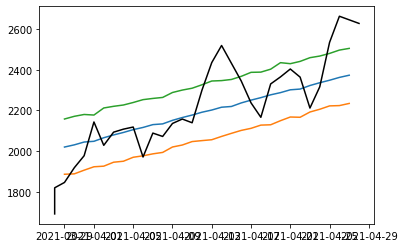

In [33]:
plt.plot(predictions.ds, predictions.yhat)
plt.plot(predictions.ds, predictions.yhat_lower)
plt.plot(predictions.ds, predictions.yhat_upper)
plt.plot(apr_close.Date, apr_close.Close, color='black')

In [52]:
eth2_df = pdr.DataReader('ETH-USD', data_source='yahoo',start='2020-01-01', end='2021-04-27')

In [53]:
eth2_df = eth2_df.reset_index()

In [54]:
eth2 = eth2_df[['Date', 'Close']]
eth2 = eth2.rename(columns={'Date':'ds', 'Close':'y'})


In [55]:
model2 = Prophet()
model2.fit(eth2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future2 = model2.make_future_dataframe(periods=60)
forecast2 = model2.predict(future2)

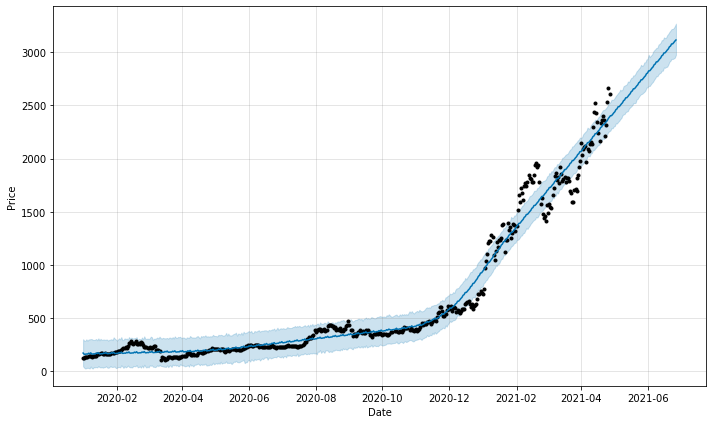

In [57]:
figure_new = model2.plot(forecast2, xlabel='Date', ylabel='Price')

In [59]:
futures = forecast2[['ds','yhat_lower','yhat_upper','yhat']]
futures.ds = pd.to_datetime(futures.ds)
futures = futures.loc[futures.ds > '2021-4-27']
futures.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,yhat_lower,yhat_upper,yhat
count,61.000000,61.000000,61.000000
mean,2619.177586,2890.540999,2755.331827
std,209.093329,217.213979,213.614246
min,2263.311899,2530.006281,2402.062846
25%,2441.125843,2697.126604,2571.112829
50%,2617.360423,2880.582813,2751.711935
75%,2800.956370,3076.737926,2934.235685
max,2973.608153,3266.773959,3113.385640
